----

![https://pandas.pydata.org/](pandas.png)

----

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Just So we can log 
# nice logging
from icecream import ic
import sys, re
def printError(e): print("Error: {}".format(e), file=sys.stderr)
    
def jupyter(*args): 
    print(*[re.sub(r",\s{1,}", ", ", i.replace(",\n", ", ")) for i in args], file=sys.stdout)
    
ic.configureOutput(prefix='ic> ', outputFunction=jupyter)

rnd = np.random.RandomState(42)

# Pandas

_**Talks**_:
    
* "[How to use pandas the wrong way](https://www.youtube.com/watch?v=4JwpDGrMsJE)", by Pietro Battiston  @EuroPython 2017 (
[code](https://pietrobattiston.it/python:pycon)
)
* "[Neat Analytics with Pandas Indexes](https://www.youtube.com/watch?v=WjEVJ4x2SXE&)", by Alexander Hendorf @EuroPython 2017 (
  [slides](https://www.slideshare.net/PoleSystematicParisRegion/neat-analytics-with-pandas-indexes-alexander-hendorf)
)
* "[Data Wrangling & Visualization with Pandas and Jupyter](https://github.com/alanderex/pydata-pandas-workshop)", by Alexander Hendorf @EuroPython 2018

*  "[Pandas for Data Analysis](https://www.youtube.com/watch?v=oGzU688xCUs)" by Daniel Chen, @SciPy 2017 (
  [code](https://github.com/chendaniely/scipy-2017-tutorial-pandas)
)

_**Docks:**_

* https://pandas.pydata.org/pandas-docs/stable/reference/

_**Books:**_

* [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)
* [Python Data Science](http://shop.oreilly.com/product/0636920034919.do)

## Getting Started

`pandas` allow us plot, explore, data. perform math on large sets of it.

### Versions and general overview

In [2]:
# version
ic(pd.__version__)

ic> pd.__version__: '0.24.2'


'0.24.2'

In [3]:
economics = pd.read_csv('data/economics.csv', index_col='date',parse_dates=True)
economics.head(2)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945


### Options

https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options

In [4]:
ic(pd.describe_option("display.max_rows"))

with pd.option_context('display.max_rows', 2):
    ic(pd.get_option("display.max_rows"))
ic(pd.get_option("display.max_rows"))
print("----"*20)
ic(pd.get_option("display.max_rows"))
ic(pd.set_option("display.max_rows", 2))
ic(pd.get_option("display.max_rows"))
print("----"*20)
ic(pd.reset_option("display.max_rows"))
ic(pd.get_option("display.max_rows"))

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 60]


ic> pd.describe_option("display.max_rows"): None
ic> pd.get_option("display.max_rows"): 2
ic> pd.get_option("display.max_rows"): 60
--------------------------------------------------------------------------------
ic> pd.get_option("display.max_rows"): 60
ic> pd.set_option("display.max_rows", 2): None
ic> pd.get_option("display.max_rows"): 2
----------------------------------

60

## DataTypes: Series and DataFrames

Types:
* `np.bool` (`bool`) - Stored as a single byte.
* `np.int` (`int`) - Defaulted to 64 bits, Unsigned ints is alaso available (`np.uint`)
* `np.float` (`float`) - Defaulted to 64 bits.
* `np.complex` (`complex`) - Rarely seen in DA
* `np.object` (`O`, `object`) - Typically strings but is a catch- all for columns with multiple different types or other Python objects (tuples, lists, dicts, and so on).
* `np.datetime64`, `pd.Timestamp` (`datetime64`) - Specific moment in time with nanosecond precision.
* `np.timedelta64`,`pd.Timedelta` (`timedelta64`) - An amount of time, from days to nanoseconds.
* `pd.Categorical` (`Categorical`) - Specific only to pandas. Useful for object columns with relatively few unique values.

In [5]:
ic(economics.get_dtype_counts())

print("-"*60)

ic(economics.dtypes)
 

ic> economics.get_dtype_counts(): float64    3
                                  int64      2
                                  dtype: int64
------------------------------------------------------------
ic> economics.dtypes: pce         float64
                      pop           int64
                      psavert     float64
                      uempmed     float64
                      unemploy      int64
                      dtype: object


pce         float64
pop           int64
psavert     float64
uempmed     float64
unemploy      int64
dtype: object

### `pd.Series`

`numpy` array with labels

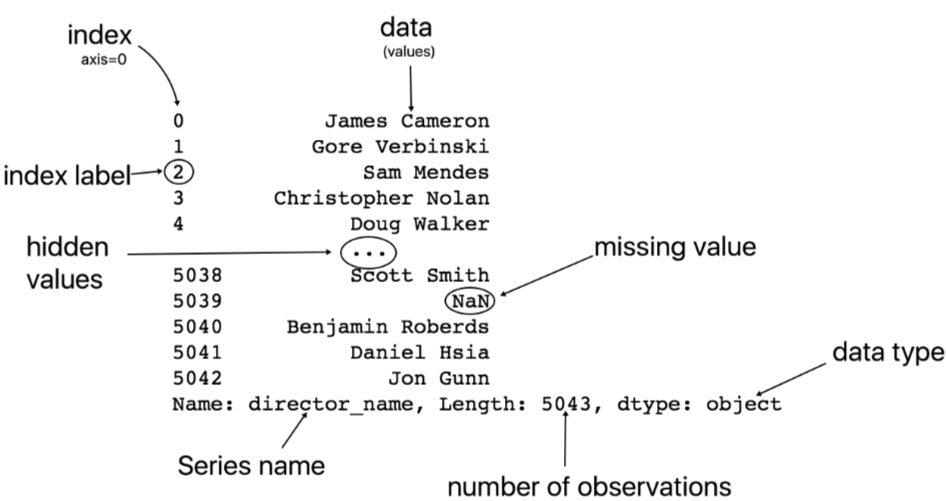

In [6]:
rnd_series = pd.Series(rnd.randint(0, 10, 6))

ic(type(rnd_series))
ic(rnd_series.shape)
ic(rnd_series.index)
ic(rnd_series.value_counts(normalize=True))
ic(rnd_series.hasnans)

ic> type(rnd_series): <class 'pandas.core.series.Series'>
ic> rnd_series.shape: (6,)
ic> rnd_series.index: RangeIndex(start=0, stop=6, step=1)
ic> rnd_series.value_counts(normalize=True): 6    0.333333
                                             7    0.166667
                                             4    0.166667
                                             3    0.166667
                                             9    0.166667
                                             dtype: float64
ic> rnd_series.hasnans: False


False

### `pd.DataFrame`

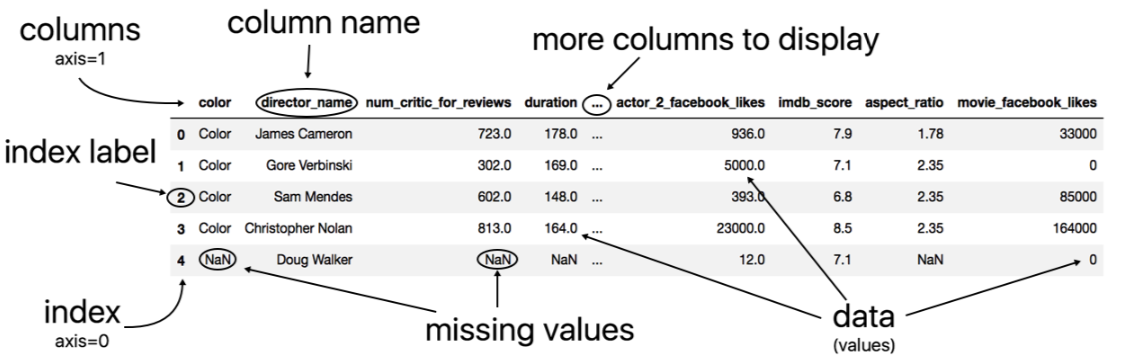

In [7]:
economics = pd.read_csv('data/economics.csv', index_col='date',parse_dates=True)
economics.head(2)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945


In [8]:
# row
ic(economics.values[0])
ic(type(economics.values))
ic(economics.shape)
ic(economics.columns[0:4])
ic(economics.index[0])

ic> economics.values[0]: array([5.07400e+02, 1.98712e+05, 1.25000e+01, 4.50000e+00, 2.94400e+03])
ic> type(economics.values): <class 'numpy.ndarray'>
ic> economics.shape: (574, 5)
ic> economics.columns[0:4]: Index(['pce', 'pop', 'psavert', 'uempmed'], dtype='object')
ic> economics.index[0]: Timestamp('1967-07-01 00:00:00')


Timestamp('1967-07-01 00:00:00')

In [9]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 574 entries, 1967-07-01 to 2015-04-01
Data columns (total 5 columns):
pce         574 non-null float64
pop         574 non-null int64
psavert     574 non-null float64
uempmed     574 non-null float64
unemploy    574 non-null int64
dtypes: float64(3), int64(2)
memory usage: 26.9 KB


## Data: Generate Data (`numpy`)

`pandas` use `numpy` to generate indexes, and perform operations on matrixes

### Random data in Dataframe/Series

In [10]:
# generating random data based on numpy generated array
pd.DataFrame(rnd.randint(0, 10, 6).reshape(-1, 6)).head()

,0,1,2,3,4,5
0,2,6,7,4,3,7


## Data: Import and Export

* https://pandas.pydata.org/pandas-docs/stable/reference/io.html

### Import
We can import data from: `csv`, `excel`,  `excel`, `hdfs`, etc... 

In [11]:
# Read a comma-separated values (csv) file into DataFrame.
economics = pd.read_csv('data/economics.csv', index_col='date', parse_dates=True)
economics.head(3)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958


### Export

In [12]:
# excel export depends on openpyxl
!pip install openpyxl 2>&1 1>/dev/null

In [13]:
# Write DataFrame to a comma-separated values (csv) file.
economics.to_csv(path_or_buf="data.csv", index=False)

# and actual saving dataframe to excel
economics.to_excel("data.xlsx")

In [14]:
!unlink data.xlsx
!unlink data.csv

### Export to data structures

In [15]:
dfdict = economics.to_dict()
ic(len(dfdict))
ic(dfdict.keys())

ic> len(dfdict): 5
ic> dfdict.keys(): dict_keys(['pce', 'pop', 'psavert', 'uempmed', 'unemploy'])


dict_keys(['pce', 'pop', 'psavert', 'uempmed', 'unemploy'])

## Data: Indexing

### `pd.Index`

In [16]:
# manualy created index
indexes=pd.Index([0,1,2,3,4,5,6])

ic(type(indexes))
ic(indexes.size)
ic(indexes.shape) 
ic(indexes.dtype)

ic> type(indexes): <class 'pandas.core.indexes.numeric.Int64Index'>
ic> indexes.size: 7
ic> indexes.shape: (7,)
ic> indexes.dtype: dtype('int64')


dtype('int64')

Create index and sort index on existing dataframe

In [17]:
economics.set_index('unemploy').sort_index().head(5)

,pce,pop,psavert,uempmed
unemploy,,,,
2685,577.2,201621,10.9,4.4
2686,568.8,201095,10.4,4.6
2689,572.3,201290,10.6,4.8
2692,589.5,201881,9.4,4.9
2709,544.6,200208,12.2,4.6


and reset index

In [18]:
economics.set_index('unemploy').reset_index().head(2)

,unemploy,pce,pop,psavert,uempmed
0,2944,507.4,198712,12.5,4.5
1,2945,510.5,198911,12.5,4.7


### `pd.DatetimeIndex`

https://docs.scipy.org/doc/numpy/reference/arrays.datetime.html

In [19]:
# we can use numpy generated arrys for indexes or data
np.arange('1993-01-01', '1993-01-20', dtype="datetime64[W]")

array(['1992-12-31', '1993-01-07'], dtype='datetime64[W]')

In [20]:
# date generation
pd.date_range("2001-01-01", periods=3, freq="w")

DatetimeIndex(['2001-01-07', '2001-01-14', '2001-01-21'], dtype='datetime64[ns]', freq='W-SUN')

In [21]:
# autoguessing date format
pd.to_datetime(['1/2/2018', 'Jan 04, 2018'])

DatetimeIndex(['2018-01-02', '2018-01-04'], dtype='datetime64[ns]', freq=None)

In [22]:
# providing dateformat
pd.to_datetime(['2/1/2018', '6/1/2018'], format="%d/%m/%Y")

DatetimeIndex(['2018-01-02', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [23]:
# bussines days 
pd.date_range("2018-01-02", periods=3, freq='B')

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04'], dtype='datetime64[ns]', freq='B')

Parsing dates

In [24]:
economics = pd.read_csv('data/economics.csv',  parse_dates=True)
economics.head(3)

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,507.4,198712,12.5,4.5,2944
1,1967-08-01,510.5,198911,12.5,4.7,2945
2,1967-09-01,516.3,199113,11.7,4.6,2958


In [25]:
pd.to_datetime(economics['date'], format='%Y-%m-%d').dt.strftime("%Y")[1:4]

1    1967
2    1967
3    1967
Name: date, dtype: object

post load datetime transformation

In [26]:
economics = pd.read_csv('data/economics.csv')
economics['date'] = pd.to_datetime(economics['date'])
economics.set_index('date',inplace=True)
economics.head(3)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958


### Labels

In [27]:
tmp = pd.Series(['Oleg', 'Developer'], index=['person', 'who'])

#  loc allow to request data by named index
# iloc allow to request data by numeric index 
ic(tmp.loc['person'])
ic(tmp.iloc[1])

ic> tmp.loc['person']: 'Oleg'
ic> tmp.iloc[1]: 'Developer'


'Developer'

In [28]:
tmp = pd.Series(range(26), index=[x for x in 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'])

ic(tmp[3:9].values)
ic(tmp["D":"I"].values)
ic(tmp.iloc[3:9].values)

ic> tmp[3:9].values: array([3, 4, 5, 6, 7, 8])
ic> tmp["D":"I"].values: array([3, 4, 5, 6, 7, 8])
ic> tmp.iloc[3:9].values: array([3, 4, 5, 6, 7, 8])


array([3, 4, 5, 6, 7, 8])

re-labeling / re-indexing

In [29]:
# reindexing
tmp.index = [x for x in 'GATTACAHIJKLMNOPQRSTUVWXYZ']
ic(tmp.loc['G'])

# Requesting non uniq values
try:
    tmp.loc['G':'A']
except KeyError as e:
    printError(e)

ic> tmp.loc['G']: 0


Error: "Cannot get right slice bound for non-unique label: 'A'"


### Index Based Access

In [30]:
economics = pd.read_csv('data/economics.csv', index_col=["date"], parse_dates=True)
economics.head(3)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945
1967-09-01,516.3,199113,11.7,4.6,2958


In [31]:
# access top data using column name
economics["unemploy"].head(2)

date
1967-07-01    2944
1967-08-01    2945
Name: unemploy, dtype: int64

In [32]:
# or using column as property
economics.unemploy.head(2)

date
1967-07-01    2944
1967-08-01    2945
Name: unemploy, dtype: int64

In [33]:
economics.iloc[[0], :]
economics.iloc[[0,2,5,4], [0,1,2]]

,pce,pop,psavert
date,,,
1967-07-01,507.4,198712,12.5
1967-09-01,516.3,199113,11.7
1967-12-01,525.8,199657,12.1
1967-11-01,518.1,199498,12.5


In [34]:
economics[['pce', 'pop']].head(2)

,pce,pop
date,,
1967-07-01,507.4,198712
1967-08-01,510.5,198911


`loc` based indexing

In [35]:
# ranges and selections
economics.loc['1967-07-01':'1967-09-01', ['pop', 'pce']].head(2)

,pop,pce
date,,
1967-07-01,198712,507.4
1967-08-01,198911,510.5


In [36]:
# ranges and ALL
economics.loc['1967-07-01':'1967-09-01', :].head(2)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945


In [37]:
# ranges and ranges
economics.loc['1967-07-01':'1967-09-01', 'pce':'psavert'].head(2)

,pce,pop,psavert
date,,,
1967-07-01,507.4,198712,12.5
1967-08-01,510.5,198911,12.5


`iloc` based indexes

In [38]:
# ranges and ALL
economics.iloc[0:5,:].head(2)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945


In [39]:
# ranges and selection
economics.iloc[0:5,[0,3,4]].head(2)

,pce,uempmed,unemploy
date,,,
1967-07-01,507.4,4.5,2944
1967-08-01,510.5,4.7,2945


In [40]:
# ranges and ranges
economics.iloc[0:5, 2:4].head(2)

,psavert,uempmed
date,,
1967-07-01,12.5,4.5
1967-08-01,12.5,4.7


In [41]:
# combining different aproaches
pd.concat([
    economics.iloc[0:1, 2:4],
    economics.iloc[6:7, 2:4],
    economics.loc['1978-07-01':'1978-09-01', ['psavert','uempmed']],
]).head(3)

,psavert,uempmed
date,,
1967-07-01,12.5,4.5
1968-01-01,11.7,5.1
1978-07-01,10.3,5.8


In [42]:
# combining preselected columns with loc.
economics[['pce', 'unemploy']].loc['1967-07-01':'1969-07-01'].head(2)

,pce,unemploy
date,,
1967-07-01,507.4,2944
1967-08-01,510.5,2945


In [43]:
# combining preselected columns with loc.
economics[['pce', 'unemploy']].iloc[10:14].head(2)

,pce,unemploy
date,,
1968-05-01,550.4,2740
1968-06-01,556.8,2938


### Conditional Indexes

In [44]:
economics.loc[((economics.pce <= 630) & (economics.pce >= 600)), ['psavert', 'unemploy']].head(2)

,psavert,unemploy
date,,
1969-05-01,10.0,2713
1969-06-01,10.9,2816


### Labeled Indexes (2)

In [45]:
size = 10
tmp = pd.DataFrame(rnd.randint(0, 10, size**2).reshape(size, -1), 
                  index=[f"R{x:02d}" for x in range(size)],
                  columns = [f"C{x:02d}" for x in range(size)])

tmp

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R00,7,2,5,4,1,7,5,1,4,0
R01,9,5,8,0,9,2,6,3,8,2
R02,4,2,6,4,8,6,1,3,8,1
R03,9,8,9,4,1,3,6,7,2,0
R04,3,1,7,3,1,5,5,9,3,5
R05,1,9,1,9,3,7,6,8,7,4
R06,1,4,7,9,8,8,0,8,6,8
R07,7,0,7,7,2,0,7,2,2,0
R08,4,9,6,9,8,6,8,7,1,0
R09,6,6,7,4,2,7,5,2,0,2


In [46]:
# rows not found.
tmp['C05':'C09']

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09


In [47]:
# but as column its ok!
tmp['C05']

R00    7
R01    2
R02    6
R03    3
R04    5
R05    7
R06    8
R07    0
R08    6
R09    7
Name: C05, dtype: int64

In [48]:
tmp['R05':'R06']

,C00,C01,C02,C03,C04,C05,C06,C07,C08,C09
R05,1,9,1,9,3,7,6,8,7,4
R06,1,4,7,9,8,8,0,8,6,8


### MultiIndex

In [49]:
pdlen = 20

tmp = pd.DataFrame(
    {
        'city'     : [x for x in ['Paris', 'London', 'Berlin', 'Manchester', 'Kyiv']*10][:pdlen],
        'category' : rnd.randint(0, 7, pdlen),
        'price'    : rnd.randint(10, 300, pdlen),
        'rating'   : rnd.randint(0, 5, pdlen),
    }
)

tmp['country'] = tmp['city'].map({
    'Paris':'FR', 
    'London':'UK', 
    'Berlin':'DE', 
    'Manchester':'US', 
    'Kyiv':'UA',
})

tmp.head(5)

,city,category,price,rating,country
0,Paris,4,72,4,FR
1,London,6,240,0,UK
2,Berlin,5,250,4,DE
3,Manchester,2,61,3,US
4,Kyiv,0,105,3,UA


In [50]:
tmp = tmp.groupby(['country', 'city', 'category']).mean()
tmp

price  rating
country city       category               
DE      Berlin     0          22.0     0.0
                   3         293.0     3.0
                   5         250.0     4.0
                   6         246.0     3.0
FR      Paris      1         252.0     2.0
                   4         151.5     3.5
                   6          38.0     3.0
UA      Kyiv       0         105.0     3.0
                   2         179.0     0.0
                   5         180.0     1.0
                   6         196.0     0.0
UK      London     1         167.5     1.5
                   2          45.0     0.0
                   6         240.0     0.0
US      Manchester 2          61.0     3.0
                   4          75.0     4.0
                   6         160.5     1.0

In [51]:
# show all indexes and levels
ic(tmp.index)
ic(tmp.index.levels)
print("-"*70)
ic(tmp.index.names)
ic(tmp.index.values)
print("-"*70)
ic(tmp.index.get_level_values(2))
print("-"*70)
ic(tmp.loc["UA"])
print("-"*70)
ic(tmp.loc["UA", "Kyiv"].max())
ic(tmp.loc["UA", "Kyiv", 0:4])

ic> tmp.index: MultiIndex(levels=[['DE', 'FR', 'UA', 'UK', 'US'], ['Berlin', 'Kyiv', 'London', 'Manchester', 'Paris'], [0, 1, 2, 3, 4, 5, 6]], codes=[[0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4], [0, 0, 0, 0, 4, 4, 4, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3], [0, 3, 5, 6, 1, 4, 6, 0, 2, 5, 6, 1, 2, 6, 2, 4, 6]], names=['country', 'city', 'category'])
ic> tmp.index.levels: FrozenList([['DE', 'FR', 'UA', 'UK', 'US'], ['Berlin', 'Kyiv', 'London', 'Manchester', 'Paris'], [0, 1, 2, 3, 4, 5, 6]])
----------------------------------------------------------------------
ic> tmp.index.names: FrozenList(['country', 'city', 'category'])
ic> tmp.index.values: array([('DE', 'Berlin', 0), ('DE', 'Berlin', 3), ('DE', 'Berlin', 5), ('DE', 'Berlin', 6), ('FR', 'Paris', 1), ('FR', 'Paris', 4), ('FR', 'Paris', 6), ('UA', 'Kyiv', 0), ('UA', 'Kyiv', 2), ('UA', 'Kyiv', 5), ('UA', 'Kyiv', 6), ('UK', 'London', 1), ('UK', 'London', 2), ('UK', 'London', 6), ('US', 'Manchester', 2), ('US', 'Manchester', 4), ('US', 'Ma

price  rating
country city category               
UA      Kyiv 0         105.0     3.0
             2         179.0     0.0

In [52]:
# without inplace=True it will return new dataframe
tmp.rename(index={'UA':'ЮА'}, columns={'price':'Precio'}, inplace=True)
tmp

Precio  rating
country city       category                
DE      Berlin     0           22.0     0.0
                   3          293.0     3.0
                   5          250.0     4.0
                   6          246.0     3.0
FR      Paris      1          252.0     2.0
                   4          151.5     3.5
                   6           38.0     3.0
ЮА      Kyiv       0          105.0     3.0
                   2          179.0     0.0
                   5          180.0     1.0
                   6          196.0     0.0
UK      London     1          167.5     1.5
                   2           45.0     0.0
                   6          240.0     0.0
US      Manchester 2           61.0     3.0
                   4           75.0     4.0
                   6          160.5     1.0

### `pd.Index` as Sets

In [53]:
# intersection
ic(pd.Index([1,2,3,4]) & pd.Index([3,4,5,6]))

# union
ic(pd.Index([1,2,3,4]) | pd.Index([3,4,5,6]))

# symetric difference
ic(pd.Index([1,2,3,4]) ^ pd.Index([3,4,5,6]))

ic> pd.Index([1,2,3,4]) & pd.Index([3,4,5,6]): Int64Index([3, 4], dtype='int64')
ic> pd.Index([1,2,3,4]) | pd.Index([3,4,5,6]): Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')
ic> pd.Index([1,2,3,4]) ^ pd.Index([3,4,5,6]): Int64Index([1, 2, 5, 6], dtype='int64')


Int64Index([1, 2, 5, 6], dtype='int64')

### Index Aligment

In [54]:
# source data area and population
data_area = { 'Alaska': 1723337,  'Texas': 695662, 'California': 423967}
data_ppls = { 'California': 38332521, 'Texas': 26448193, 'New York': 19651127}

area = pd.Series(data_area, name='area')
ppls = pd.Series(data_ppls, name='ppls')

# Index aligment
ic(ppls/area)

ic> ppls/area: Alaska              NaN
               California    90.413926
               New York            NaN
               Texas         38.018740
               dtype: float64


Alaska              NaN
California    90.413926
New York            NaN
Texas         38.018740
dtype: float64

One more example

In [55]:
A = pd.Series([2, 4, 6], index=[0, 1, 2]) 
B = pd.Series([1, 3, 5], index=[1, 2, 3]) 

ic(A+B)

ic> A+B: 0    NaN
         1    5.0
         2    9.0
         3    NaN
         dtype: float64


0    NaN
1    5.0
2    9.0
3    NaN
dtype: float64

using functions methods (`.add()` instead `+` ) we can fill nan values

In [56]:
# using function we can fill nan values
ic(A.add(B, fill_value=100))

ic> A.add(B, fill_value=100): 0    102.0
                              1      5.0
                              2      9.0
                              3    105.0
                              dtype: float64


0    102.0
1      5.0
2      9.0
3    105.0
dtype: float64

In [57]:
economics = pd.read_csv('data/economics.csv', index_col='date',parse_dates=True)

ic(economics.unemploy.idxmin())
ic(economics.unemploy.min())
ic(np.argmin(economics.unemploy))
print("-"*60)
ic(economics.unemploy.idxmax())
ic(economics.unemploy.max())
ic(np.argmax(economics.unemploy))

ic> economics.unemploy.idxmin(): Timestamp('1968-12-01 00:00:00')
ic> economics.unemploy.min(): 2685
ic> np.argmin(economics.unemploy): Timestamp('1968-12-01 00:00:00')
------------------------------------------------------------
ic> economics.unemploy.idxmax(): Timestamp('2009-10-01 00:00:00')
ic> economics.unemploy.max(): 15352
ic> np.argmax(economics.unemploy): Timestamp('2009-10-01 00:00:00')


/Users/butuzov/venvs/jupyter/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  return getattr(obj, method)(*args, **kwds)
/Users/butuzov/venvs/jupyter/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2009-10-01 00:00:00')

## Data: Handling Data

### Handling Missing Data

In [58]:
titanic = pd.read_csv('data/titanic.csv', keep_default_na=False)
titanic['age'][4:7].head()

4    35.0
5        
6    54.0
Name: age, dtype: object

In [59]:
# Additional strings to recognize as NA/NaN. 
# If dict passed, specific per-column NA values. 
# By default the following values are interpreted as 
# NaN: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, 
# ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.
titanic = pd.read_csv('data/titanic.csv', na_values=[35.0])
titanic['age'][4:7].head()

4     NaN
5     NaN
6    54.0
Name: age, dtype: float64

In [60]:
titanic = pd.read_csv('data/titanic.csv', keep_default_na=True)
titanic['age'][4:7].head()

4    35.0
5     NaN
6    54.0
Name: age, dtype: float64

In [61]:
ic(titanic['age'].hasnans)
ic(titanic['age'].isnull().sum())
ic(titanic['age'].dropna().hasnans)
ic(titanic['age'].dropna().isnull().sum())
ic(titanic['age'].notnull().sum())
ic(np.count_nonzero(titanic['age'].isnull()))

ic> titanic['age'].hasnans: True
ic> titanic['age'].isnull().sum(): 177
ic> titanic['age'].dropna().hasnans: False
ic> titanic['age'].dropna().isnull().sum(): 0
ic> titanic['age'].notnull().sum(): 714
ic> np.count_nonzero(titanic['age'].isnull()): 177


177

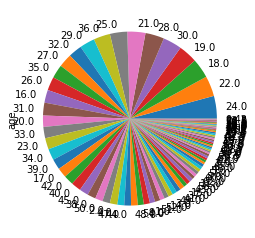

In [62]:
titanic.age.value_counts(dropna=True).plot.pie()

getting rid of `nan`s

In [63]:
ages = pd.DataFrame()

ages['fillna(0)']      = titanic['age'].fillna(0)
ages['fillna - ffill'] = titanic['age'].fillna(method='ffill')
ages['fillna - bfill'] = titanic['age'].fillna(method='bfill')
ages['dropna']         = titanic['age'].dropna(inplace=False )
ages['interpolate']    = titanic['age'].interpolate()
ages['min']            = titanic['age'].fillna(titanic['age'].min())
ages['mean']           = titanic['age'].fillna(titanic['age'].mean())
ages[4:7]

,fillna(0),fillna - ffill,fillna - bfill,dropna,interpolate,min,mean
4,35.0,35.0,35.0,35.0,35.0,35.00,35.000000
5,0.0,35.0,54.0,NaN,44.5,0.42,29.699118
6,54.0,54.0,54.0,54.0,54.0,54.00,54.000000


### Melting/Mergin/Concating Data

In [64]:
titanic = pd.read_csv('data/titanic.csv', keep_default_na=True)
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


Renaming columns and indexes

In [65]:
titanic.rename(columns={'sex':'gender'}, inplace=True)
titanic.head(3)

,survived,pclass,gender,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


droping columns

In [66]:
titanic.drop('embarked', axis=1, errors="ignore", inplace=True)
titanic.drop('who', axis=1, errors="ignore", inplace=True)
titanic.drop(['adult_male', 'alone'], axis=1, errors="ignore", inplace=True) 
titanic.drop(['parch', 'deck'], axis=1, errors="ignore", inplace=True)
titanic.head(3)

,survived,pclass,gender,age,sibsp,fare,class,embark_town,alive
0,0,3,male,22.0,1,7.2500,Third,Southampton,no
1,1,1,female,38.0,1,71.2833,First,Cherbourg,yes
2,1,3,female,26.0,0,7.9250,Third,Southampton,yes


In [67]:
# fares 
titanic = titanic.groupby(['class', 'embark_town', 'gender'])['age'].mean().reset_index()
titanic

,class,embark_town,gender,age
0,First,Cherbourg,female,36.052632
1,First,Cherbourg,male,40.111111
2,First,Queenstown,female,33.000000
3,First,Queenstown,male,44.000000
4,First,Southampton,female,32.704545
5,First,Southampton,male,41.897188
6,Second,Cherbourg,female,19.142857
7,Second,Cherbourg,male,25.937500
8,Second,Queenstown,female,30.000000
9,Second,Queenstown,male,57.000000


pivoting data

In [68]:
titanic.pivot_table(index=['class','gender'],columns='embark_town',values='age').reset_index().head(3)

embark_town,class,gender,Cherbourg,Queenstown,Southampton
0,First,female,36.052632,33.0,32.704545
1,First,male,40.111111,44.0,41.897188
2,Second,female,19.142857,30.0,29.719697


melting data

In [69]:
pd.melt(titanic, id_vars=['class', 'gender']).head(3)

,class,gender,variable,value
0,First,female,embark_town,Cherbourg
1,First,male,embark_town,Cherbourg
2,First,female,embark_town,Queenstown


In [70]:
# todo - cover 
# unstack()
# stack()

### Common Math operations over the DataFrames/Series

In [71]:
economics = pd.read_csv('data/economics.csv', index_col='date',parse_dates=True)

In [72]:
economics.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 574 entries, 1967-07-01 to 2015-04-01
Data columns (total 5 columns):
pce         574 non-null float64
pop         574 non-null int64
psavert     574 non-null float64
uempmed     574 non-null float64
unemploy    574 non-null int64
dtypes: float64(3), int64(2)
memory usage: 26.9 KB


In [73]:
economics.describe()

,pce,pop,psavert,uempmed,unemploy
count,574.000000,574.000000,574.000000,574.000000,574.000000
mean,4843.510453,257189.381533,7.936585,8.610105,7771.557491
std,3579.287206,36730.801593,3.124394,4.108112,2641.960571
min,507.400000,198712.000000,1.900000,4.000000,2685.000000
25%,1582.225000,224896.000000,5.500000,6.000000,6284.000000
50%,3953.550000,253060.000000,7.700000,7.500000,7494.000000
75%,7667.325000,290290.750000,10.500000,9.100000,8691.000000
max,12161.500000,320887.000000,17.000000,25.200000,15352.000000


In [74]:
economics.pce.mean()

4843.510452961673

In [75]:
economics.pce = economics.pce * 2
economics.head()

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,1014.8,198712,12.5,4.5,2944
1967-08-01,1021.0,198911,12.5,4.7,2945
1967-09-01,1032.6,199113,11.7,4.6,2958
1967-10-01,1025.8,199311,12.5,4.9,3143
1967-11-01,1036.2,199498,12.5,4.7,3066


In [76]:
cs = economics.pce.cumsum()
ic(cs.head(1))
ic(cs.tail(1))

ic> cs.head(1): date
                1967-07-01    1014.8
                Name: pce, dtype: float64
ic> cs.tail(1): date
                2015-04-01    5560350.0
                Name: pce, dtype: float64


date
2015-04-01    5560350.0
Name: pce, dtype: float64

### Math operations over the DataFrames/Series

Using aplly over column data

In [77]:
titanic = pd.read_csv('data/titanic.csv', keep_default_na=True)
titanic.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [78]:
def my_mean(vector):
    return vector * 5

titanic.rename(columns={'fare':'1912_£'}, inplace=True)
titanic['1912_$'] = titanic['1912_£'].apply(my_mean)

titanic.loc[:, ['class', '1912_£', '1912_$']].head(5)

,class,1912_£,1912_$
0,Third,7.2500,36.2500
1,First,71.2833,356.4165
2,Third,7.9250,39.6250
3,First,53.1000,265.5000
4,Third,8.0500,40.2500


### Grouped Calculations

In [79]:
df = pd.read_csv('data/economics.csv', parse_dates=['date'])
ic(df['date'].dtypes)

ic> df['date'].dtypes: dtype('<M8[ns]')


dtype('<M8[ns]')

In [80]:
df.groupby('date')['pce', 'unemploy'].mean().head(10)

,pce,unemploy
date,,
1967-07-01,507.4,2944
1967-08-01,510.5,2945
1967-09-01,516.3,2958
1967-10-01,512.9,3143
1967-11-01,518.1,3066
1967-12-01,525.8,3018
1968-01-01,531.5,2878
1968-02-01,534.2,3001
1968-03-01,544.9,2877


In [81]:
df.groupby(by=df['date'].dt.strftime('%Y'))['unemploy', 'uempmed'].mean().reset_index().head(3)

,date,unemploy,uempmed
0,1967,3012.333333,4.700000
1,1968,2797.416667,4.500000
2,1969,2830.166667,4.441667


In [82]:
df.groupby(by=df['date'].dt.strftime('%Y'))['unemploy', 'uempmed'].first().reset_index().head(3)

,date,unemploy,uempmed
0,1967,2944,4.5
1,1968,2878,5.1
2,1969,2718,4.4


In [83]:
df.groupby(by=df['date'].dt.strftime('%Y'))['unemploy', 'uempmed'].last().reset_index().head(3)

,date,unemploy,uempmed
0,1967,3018,4.8
1,1968,2685,4.4
2,1969,2884,4.6


### Joins

In [84]:
size = 6
df_square = pd.DataFrame(rnd.randint(0, 10, size**2).reshape(size, -1), 
                  index=[f"R{x:02d}" for x in range(size)],
                  columns = [f"C{x:02d}" for x in range(size)])

df_square

,C00,C01,C02,C03,C04,C05
R00,2,6,5,7,8,4
R01,0,2,9,7,5,7
R02,8,3,0,0,9,3
R03,6,1,2,0,4,0
R04,7,0,0,1,1,5
R05,6,4,0,0,2,1


In [85]:
df_line = pd.Series(rnd.randint(0, 10, size), index=[f"R{x+3:02d}" for x in range(size)])
df_line.name="C06"
df_line

R03    4
R04    9
R05    5
R06    6
R07    3
R08    6
Name: C06, dtype: int64

In [86]:
df_square['C06'] = df_line
df_square

,C00,C01,C02,C03,C04,C05,C06
R00,2,6,5,7,8,4,NaN
R01,0,2,9,7,5,7,NaN
R02,8,3,0,0,9,3,NaN
R03,6,1,2,0,4,0,4.0
R04,7,0,0,1,1,5,9.0
R05,6,4,0,0,2,1,5.0


clean up data

In [87]:
df_square.drop('C06', axis=1, errors="ignore", inplace=True)

In [88]:
df_square.join(pd.DataFrame(df_line), how="inner")

,C00,C01,C02,C03,C04,C05,C06
R03,6,1,2,0,4,0,4
R04,7,0,0,1,1,5,9
R05,6,4,0,0,2,1,5


In [89]:
df_square.join(pd.DataFrame(df_line), how="outer")

,C00,C01,C02,C03,C04,C05,C06
R00,2.0,6.0,5.0,7.0,8.0,4.0,NaN
R01,0.0,2.0,9.0,7.0,5.0,7.0,NaN
R02,8.0,3.0,0.0,0.0,9.0,3.0,NaN
R03,6.0,1.0,2.0,0.0,4.0,0.0,4.0
R04,7.0,0.0,0.0,1.0,1.0,5.0,9.0
R05,6.0,4.0,0.0,0.0,2.0,1.0,5.0
R06,NaN,NaN,NaN,NaN,NaN,NaN,6.0
R07,NaN,NaN,NaN,NaN,NaN,NaN,3.0
R08,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [90]:
df_square.join(pd.DataFrame(df_line), how="left")

,C00,C01,C02,C03,C04,C05,C06
R00,2,6,5,7,8,4,NaN
R01,0,2,9,7,5,7,NaN
R02,8,3,0,0,9,3,NaN
R03,6,1,2,0,4,0,4.0
R04,7,0,0,1,1,5,9.0
R05,6,4,0,0,2,1,5.0


In [91]:
df_square.join(pd.DataFrame(df_line), how="right")

,C00,C01,C02,C03,C04,C05,C06
R03,6.0,1.0,2.0,0.0,4.0,0.0,4
R04,7.0,0.0,0.0,1.0,1.0,5.0,9
R05,6.0,4.0,0.0,0.0,2.0,1.0,5
R06,NaN,NaN,NaN,NaN,NaN,NaN,6
R07,NaN,NaN,NaN,NaN,NaN,NaN,3
R08,NaN,NaN,NaN,NaN,NaN,NaN,6


### Sorting values and indexes

In [92]:
economics = pd.read_csv('data/economics.csv', index_col='date',parse_dates=True)
economics.sort_values(by='unemploy', ascending=False).head(3)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
2009-10-01,9924.6,308189,5.4,18.9,15352
2010-04-01,10106.9,309191,5.6,22.1,15325
2009-11-01,9946.1,308418,5.7,19.8,15219


In [93]:
economics.sort_index(ascending=False).head(3)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
2015-04-01,12158.9,320887,5.6,11.7,8549
2015-03-01,12161.5,320707,5.2,12.2,8575
2015-02-01,12095.9,320534,5.7,13.1,8705


## Time Series Analisis

In [94]:
economics = pd.read_csv('data/economics.csv', index_col='date',parse_dates=True)
economics.head(2)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945


In [95]:
economics.index

DatetimeIndex(['1967-07-01', '1967-08-01', '1967-09-01', '1967-10-01',
               '1967-11-01', '1967-12-01', '1968-01-01', '1968-02-01',
               '1968-03-01', '1968-04-01',
               ...
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01', '2015-01-01', '2015-02-01',
               '2015-03-01', '2015-04-01'],
              dtype='datetime64[ns]', name='date', length=574, freq=None)

**TIME SERIES OFFSET ALIASES**


ALIAS  | DESCRIPTION
-------|-------------------------------------------------------
B      | business day frequency
C      | custom business day frequency (experimental)
D      | calendar day frequency
W      | weekly frequency
M      | month end frequency
SM     | semi-month end frequency (15th and end of month)
BM     | business month end frequency
CBM    | custom business month end frequency
MS     | month start frequency
SMS    | semi-month start frequency (1st and 15th)
BMS    | business month start frequency
CBMS   | custom business month start frequency
Q      | quarter end frequency
BQ     | business quarter endfrequency
QS     | quarter start frequency
BQS    | business quarter start frequency
A      | year end frequency
BA     | business year end frequency
AS     | year start frequency
BAS    | business year start frequency
BH     | business hour frequency
H      | hourly frequency
T, min | minutely frequency
S      | secondly frequency
L, ms  | milliseconds
U, us  | microseconds
N      | nanoseconds

### Time Resampling

In [96]:
# yearly
economics.resample(rule='A').mean().head(3)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-12-31,515.166667,199200.333333,12.300000,4.700000,3012.333333
1968-12-31,557.458333,200663.750000,11.216667,4.500000,2797.416667
1969-12-31,604.483333,202648.666667,10.741667,4.441667,2830.166667


In [97]:
economics.resample(rule='A').first().head(3)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-12-31,507.4,198712,12.5,4.5,2944
1968-12-31,531.5,199808,11.7,5.1,2878
1969-12-31,584.2,201760,10.0,4.4,2718


In [98]:
# custom resampling function

def total(entry):
    if len(entry):
        return entry.sum()

economics.unemploy.resample(rule='A').apply(total).head(2)

date
1967-12-31    18074
1968-12-31    33569
Freq: A-DEC, Name: unemploy, dtype: int64

### Time/Data Shifting

http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html

In [99]:
economics.unemploy.shift(1).head(2)

date
1967-07-01       NaN
1967-08-01    2944.0
Name: unemploy, dtype: float64

In [100]:
# Shift everything forward one month
economics.unemploy.shift(periods=2, freq='M').head()

date
1967-08-31    2944
1967-09-30    2945
1967-10-31    2958
1967-11-30    3143
1967-12-31    3066
Freq: M, Name: unemploy, dtype: int64

### Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a simple moving average. 

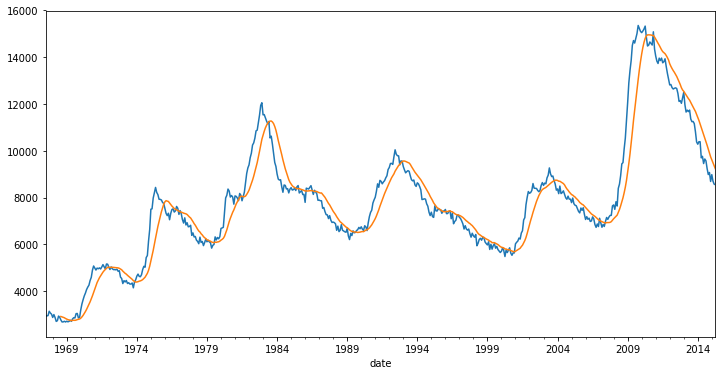

In [101]:
economics.unemploy.plot(figsize=(12,6)).autoscale(axis='x',tight=True)
economics.unemploy.rolling(window=14).mean().plot()
# economics.unemploy.rolling(window=30).max().plot()
# economics.unemploy.rolling(window=30).min().plot()

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

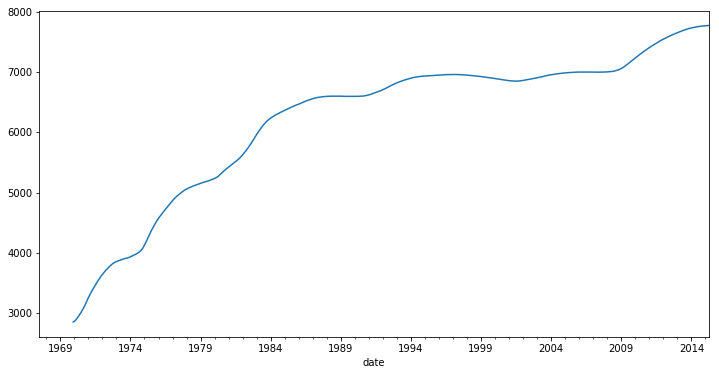

In [102]:
economics.unemploy.expanding(min_periods=30).mean().plot(figsize=(12,6))

<div class="alert alert-info">Read more at <a href="TimeSeriesAnalysis.ipynb">TimeSeriesAnalysis.ipynb</a>
</div>   

## Visualization

* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
* https://matplotlib.org/

<div class="alert alert-info">Read more at <a href="visualization.ipynb">visualization.ipynb</a>
</div>   

In [103]:
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
economics = pd.read_csv('data/economics.csv', index_col='date',parse_dates=True)
economics.head(2)

,pce,pop,psavert,uempmed,unemploy
date,,,,,
1967-07-01,507.4,198712,12.5,4.5,2944
1967-08-01,510.5,198911,12.5,4.7,2945


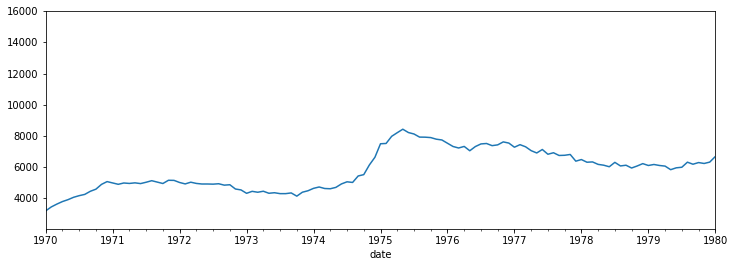

In [105]:
# ploting all data for a range of x values (date index)
_ = economics.unemploy.plot(
    figsize=(12,4),  
    xlim=['1970', '1980'],
)

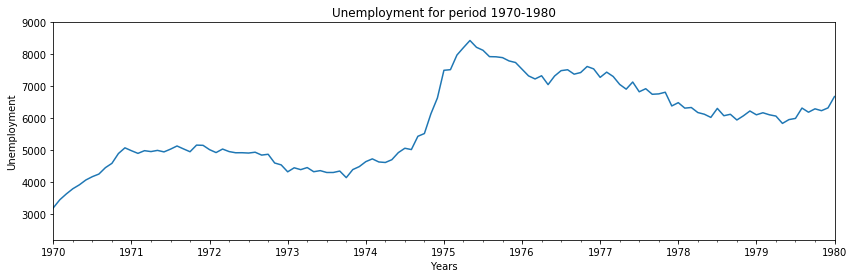

In [106]:
# or we can specify what column we want to plot
ax = economics['unemploy'].plot(
    figsize=(14,4), 
    xlim=['1970', '1980'],
    ylim=[2200, 9000],
    title="Unemployment for period 1970-1980"
)
_ = ax.set(ylabel="Unemployment", xlabel="Years")

# this will make data to fit, no matter what we set in x
# ax.autoscale(axis='x',tight=True)

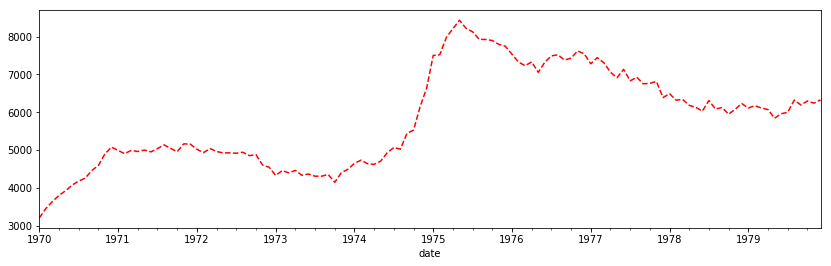

In [107]:
# x as slicing
economics['unemploy']['1970':'1979'].plot(figsize=(14,4), ls='--',c='r').autoscale(axis='x',tight=True)

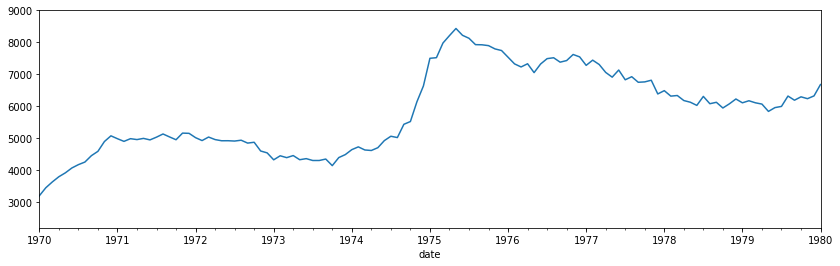

In [108]:
# or providing argument
_ = economics['unemploy'].plot(figsize=(14,4), xlim=['1970','1980'], ylim=[2200, 9000])

### X-Ticks

https://matplotlib.org/api/dates_api.html

### Date Formatting
Formatting follows the Python datetime [**strftime**](http://strftime.org/) codes. 

The following examples are based on `datetime.datetime(2001, 2, 3, 16, 5, 6)` :

CODE | MEANING                                              | EXAMPLE
-----| -----------------------------------------------------|--------------
`%Y` | Year with century as a decimal number                | 2001
`%y` | Year without century as a zero-padded decimal number | 01
`%m` | Month as a zero-padded decimal number                | 02
`%B` | Month as locale’s full name                          | February
`%b` | Month as locale’s abbreviated name                   | Feb
`%d` | Day of the month as a zero-padded decimal number     | 03
`%A` | Weekday as locale’s full name                        | Saturday
`%a` | Weekday as locale’s abbreviated name                 | Sat
`%H` | Hour (24-hour clock) as a zero-padded decimal number | 16
`%I` | Hour (12-hour clock) as a zero-padded decimal number | 04
`%p` | Locale’s equivalent of either AM or PM               | PM
`%M` | Minute as a zero-padded decimal number               | 05
`%S` | Second as a zero-padded decimal number               | 06

----

CODE  | MEANING                                | EXAMPLE
------| ---------------------------------------|--------------
`%#m` | Month as a decimal number. (Windows)   | 2 
`%-m` | Month as a decimal number. (Mac/Linux) | 2 
`%#x` | Long date                              | Saturday, February 03, 2001 
`%#c` | Long date and time                     | Saturday, February 03, 2001 16:05:06 
</table>  
    

In [109]:
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

In [110]:
from matplotlib import dates

In [111]:
# TODO - find better example so i can use month or weekend formatter.
# using Date Locator's

## Miscellaneous

### Loops 

In [112]:
# series 
s = pd.Series(range(10000))
# list
l = list(s)

Panda's Time Series

In [113]:
%timeit -n 1 -r 1 [s.iloc[i] for i in range(len(s))]

153 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Python's list

In [114]:
%timeit -n 1 -r 1 [l[i] for i in range(len(l))]

1.05 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Pandas - accesing lst element

In [115]:
%timeit -n 1 -r 1 s.iloc[-1:]

233 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


List - accesing lst element

In [116]:
%timeit -n 1 -r 1 l[-1:]

1.32 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
